In [35]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [36]:

# Define the ticker symbol for BTCUSD
ticker_symbol = 'BTC-USD'

day_palette = {
    'Monday': 'green',
    'Tuesday': 'red',
    'Wednesday': 'blue',
    'Thursday': 'purple',
    'Friday': 'pink',
    'Saturday': 'orange',
    'Sunday': 'yellow'
}

year_palette = {
    2019: 'yellow',
    2024: 'red',
    2022: 'green',
    2023: 'blue'
}

In [37]:
btc_data_from_2019_to_2024_part_1_1_d = yf.download(ticker_symbol, start='2024-01-01', end='2024-10-07', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [38]:
btc_data_from_2019_to_2024_part_1_1_d.index.name = btc_data_from_2019_to_2024_part_1_1_d.index.name.lower()
btc_data_from_2019_to_2024_part_1_1_d.columns = btc_data_from_2019_to_2024_part_1_1_d.columns.str.lower()

In [39]:
btc_data_from_2019_to_2024_part_1_1_d['year'] = btc_data_from_2019_to_2024_part_1_1_d.index.year
btc_data_from_2019_to_2024_part_1_1_d['month'] = btc_data_from_2019_to_2024_part_1_1_d.index.month
btc_data_from_2019_to_2024_part_1_1_d['day_name'] = btc_data_from_2019_to_2024_part_1_1_d.index.day_name()

In [40]:
btc_data_from_2019_to_2024_part_1_1_d['max'] = btc_data_from_2019_to_2024_part_1_1_d[['open', 'high', 'low', 'close']].max(axis=1)
btc_data_from_2019_to_2024_part_1_1_d['min'] = btc_data_from_2019_to_2024_part_1_1_d[['open', 'high', 'low', 'close']].min(axis=1)
btc_data_from_2019_to_2024_part_1_1_d['difference'] = btc_data_from_2019_to_2024_part_1_1_d['max'] - btc_data_from_2019_to_2024_part_1_1_d['min']

In [41]:
day_year_volume_analysis = btc_data_from_2019_to_2024_part_1_1_d.groupby(['day_name', 'month']).agg({'volume': 'sum'}).reset_index()

In [42]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert the 'day_name' column to a categorical type with the specified order
day_year_volume_analysis['day_name'] = pd.Categorical(
    day_year_volume_analysis['day_name'], 
    categories=day_order, 
    ordered=True
)

day_year_volume_analysis = day_year_volume_analysis.sort_values(by='day_name', ascending=True)


In [27]:
day_year_volume_analysis

,day_name,month,volume
27,Sunday,4,108130723262
30,Sunday,7,87472132515
26,Sunday,3,153912225346
25,Sunday,2,67126709182
24,Sunday,1,63055018714
31,Sunday,8,46423092835
28,Sunday,5,66974152485
29,Sunday,6,72429455667
8,Monday,1,135500575737
15,Monday,8,108991085584


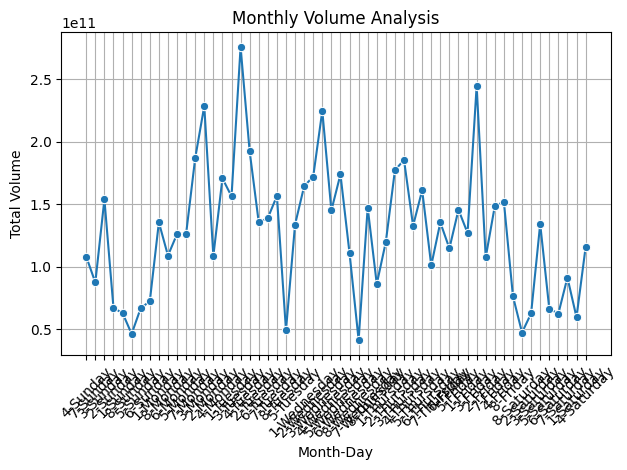

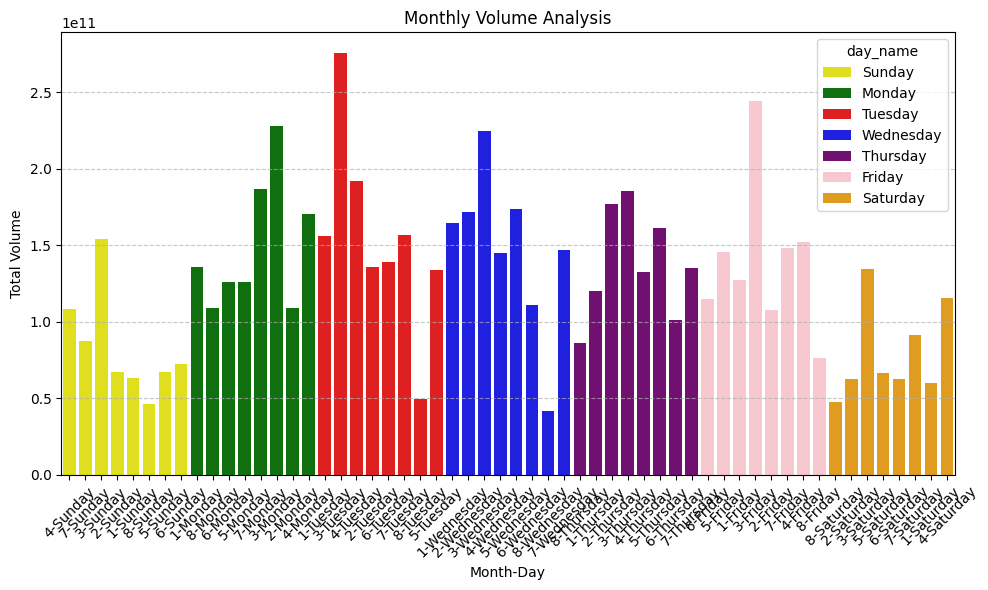

In [28]:
# Create a combined 'Year-Month' column for better x-axis labels
day_year_volume_analysis['month_day'] = day_year_volume_analysis['month'].astype(str) + '-' + day_year_volume_analysis['day_name'].astype(str)

# Line Plot
sns.lineplot(data=day_year_volume_analysis, x='month_day', y='volume', marker='o')
plt.title('Monthly Volume Analysis')
plt.xlabel('Month-Day')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=day_year_volume_analysis, x='month_day', y='volume', color='c', hue='day_name', palette=day_palette)
plt.title('Monthly Volume Analysis')
plt.xlabel('Month-Day')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# Pearson correlation (default)
correlation_matrix = day_year_volume_analysis.corr()

# print(correlation_matrix)


ValueError: could not convert string to float: 'Sunday'

In [29]:
# Encoding categorical data
day_mapping = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 7,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 4
}

day_year_volume_analysis['day_map'] = day_year_volume_analysis['day_name'].map(day_mapping)

# Calculate correlation
correlation_matrix = day_year_volume_analysis[['day_map', 'month']].corr()


In [30]:
correlation_matrix

,day_map,month
day_map,1.000000e+00,2.692903e-16
month,2.692903e-16,1.000000e+00


In [31]:
spearman_corr = day_year_volume_analysis[['day_map', 'month']].corr(method='spearman')


In [32]:
spearman_corr

,day_map,month
day_map,1.0,0.0
month,0.0,1.0


In [33]:
kendall_corr = day_year_volume_analysis[['day_map', 'month']].corr(method='kendall')


In [34]:
kendall_corr

,day_map,month
day_map,1.0,0.0
month,0.0,1.0
